# MGPO 695 - Sentiment Analysis on Presidential Public Relations through Twitter

The aim of this project is to perform sentiment analysis on tweets published by each of the three current and last presidents of the United States of America in order to draw insights on words that are most associated with people reacting to them, in a good or bad way.

The business idea behind that is to propose a sentiment analysis for a company in charge of taking care of the electoral campaigns for any politician wishing to form an image within a people.

In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## I. Trump

Load the CSV file into a pandas dataframe

In [17]:
df = pd.read_csv("trump.csv")

In [18]:
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f


#### Data Cleaning

Define the set of stop words to be removed

In [19]:
stop_words = set(stopwords.words("english"))
stop_words.update(["realdonaldtrump", "realDonaldTrump", "u", "amp", "rt", "the", "to", "is", "of", "and", "a", "in", "for", "are", "@realDonaldTrump", "on", "I"])

Remove tweets that contain URLs

In [20]:
df = df[~df['text'].str.contains("http")]

Remove punctuation and convert to lowercase

In [21]:
df['text'] = df['text'].str.lower().apply(lambda x: re.sub(r'[^\w\s]','', x))

Remove stop words

In [22]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

Remove any rows with empty clean_text values

In [23]:
df = df.dropna(subset=['text'])

### Sentiment Analysis

Calculate the sentiment analysis score for each tweet

In [24]:
df["sentiment_score"] = df["text"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

Divide tweets into clusters based on sentiment analysis score

In [25]:
sentiment_max = df["sentiment_score"].max()
sentiment_min = df["sentiment_score"].min()
sentiment_range = sentiment_max - sentiment_min
cluster_size = 0.25 * sentiment_range
df["cluster"] = df["sentiment_score"].apply(lambda score: int((score - sentiment_min) / cluster_size))

Generate a word cloud for each cluster

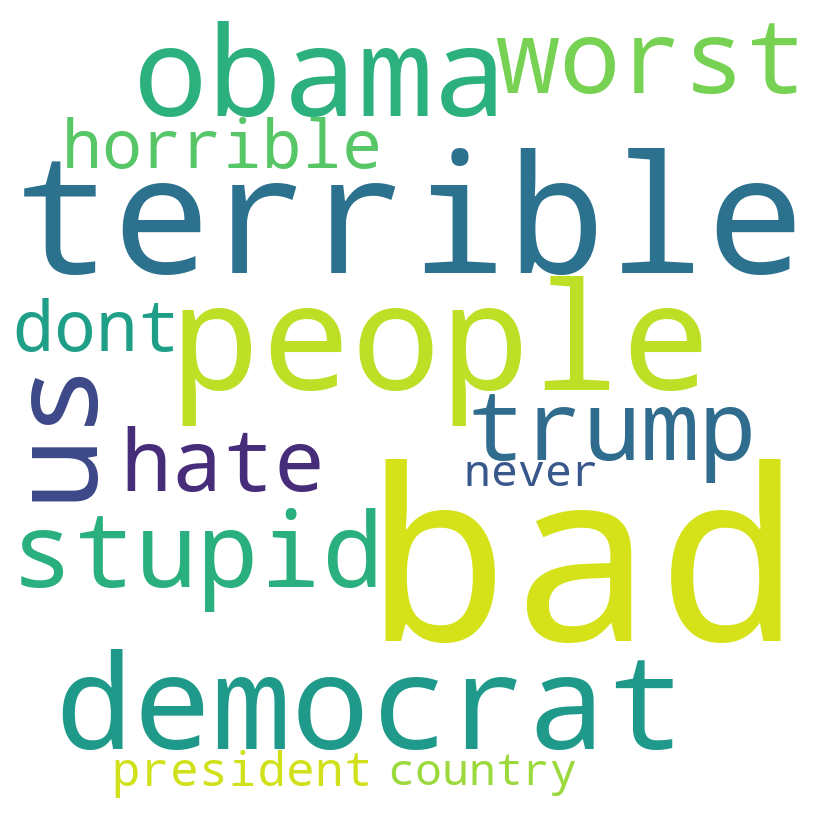

Top 30 Words in Cluster 1: 
         word  frequency
0         bad        188
1    terrible        115
2      people         87
3       worst         86
4       trump         74
5   president         73
6       obama         70
7      stupid         57
8          us         57
9        hate         54
10  democrats         53
11    country         52
12       dont         49
13   horrible         49
14        get         47
15        one         46
16      would         46
17     really         45
18       deal         45
19       like         44
20      badly         43
21      never         41
22      crazy         41
23       want         39
24       said         39
25      going         38
26       made         38
27   pathetic         37
28         go         34
29       even         34


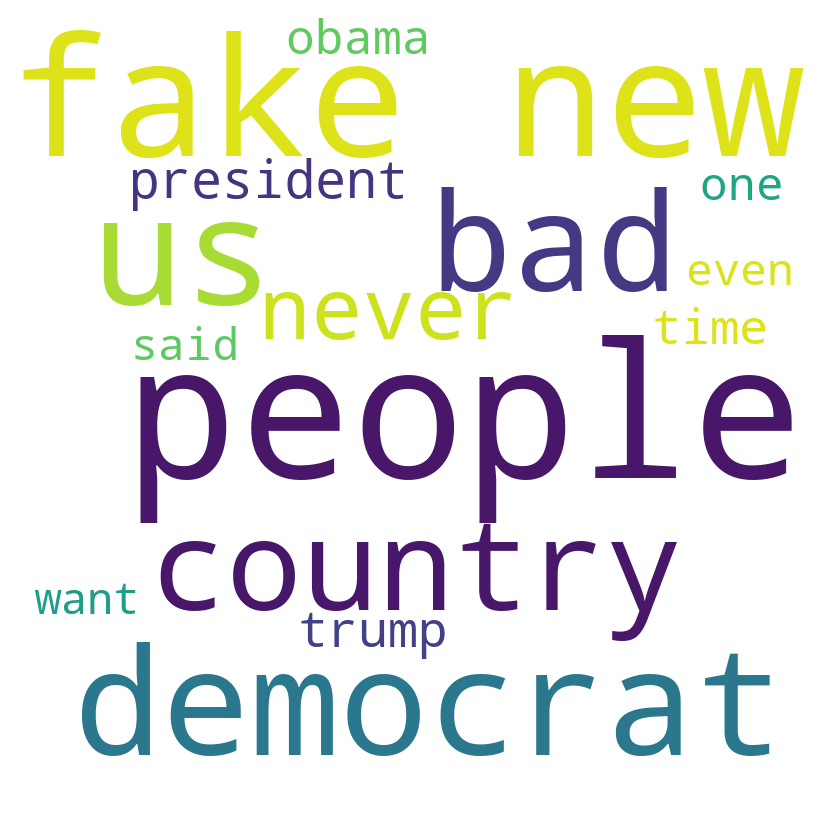

Top 30 Words in Cluster 2: 
         word  frequency
0      people        765
1        fake        752
2        news        688
3   president        645
4       trump        598
5         bad        550
6          us        531
7   democrats        521
8       never        502
9       would        460
10      media        439
11    country        414
12       time        408
13       like        407
14        get        402
15        big        399
16       dont        396
17       even        374
18      obama        371
19        new        329
20        one        325
21       hard        318
22       want        313
23    nothing        301
24       said        285
25      years        280
26      wrong        280
27       much        279
28       must        279
29    hillary        277


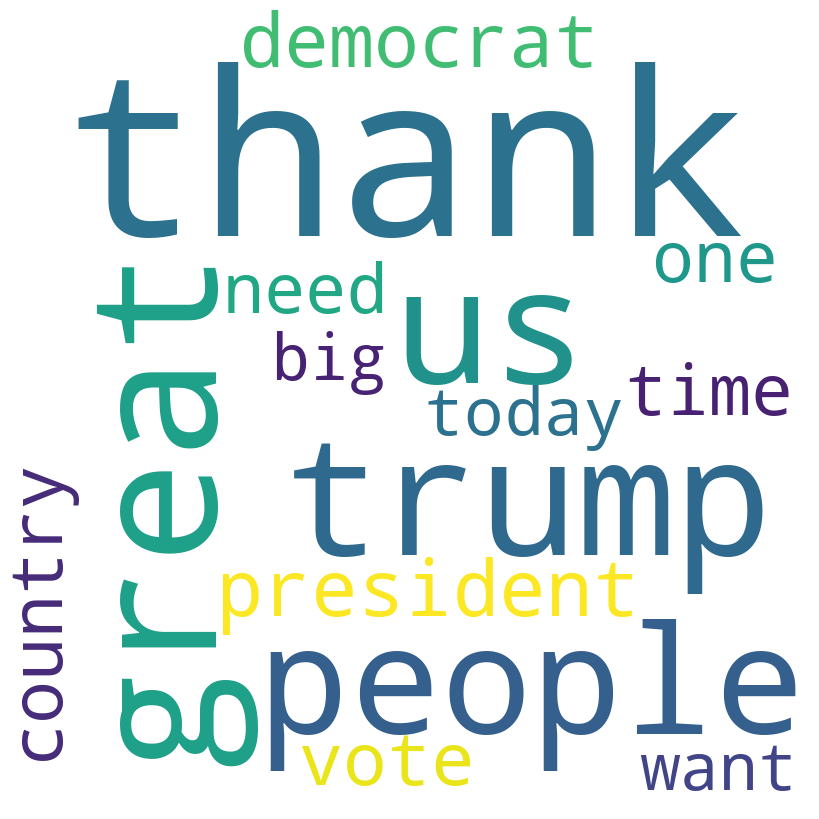

Top 30 Words in Cluster 3: 
         word  frequency
0       trump       2833
1       great       2684
2   president       2639
3      people       1692
4      thanks       1612
5         big       1427
6          us       1403
7         new       1391
8       would       1299
9         get       1271
10      thank       1206
11    country       1193
12       like       1140
13        one       1030
14       many       1005
15       time        997
16  democrats        948
17       good        926
18       dont        925
19      never        924
20       vote        904
21       back        896
22       much        889
23    america        882
24      obama        837
25      going        818
26        run        798
27     donald        773
28       want        770
29      today        745


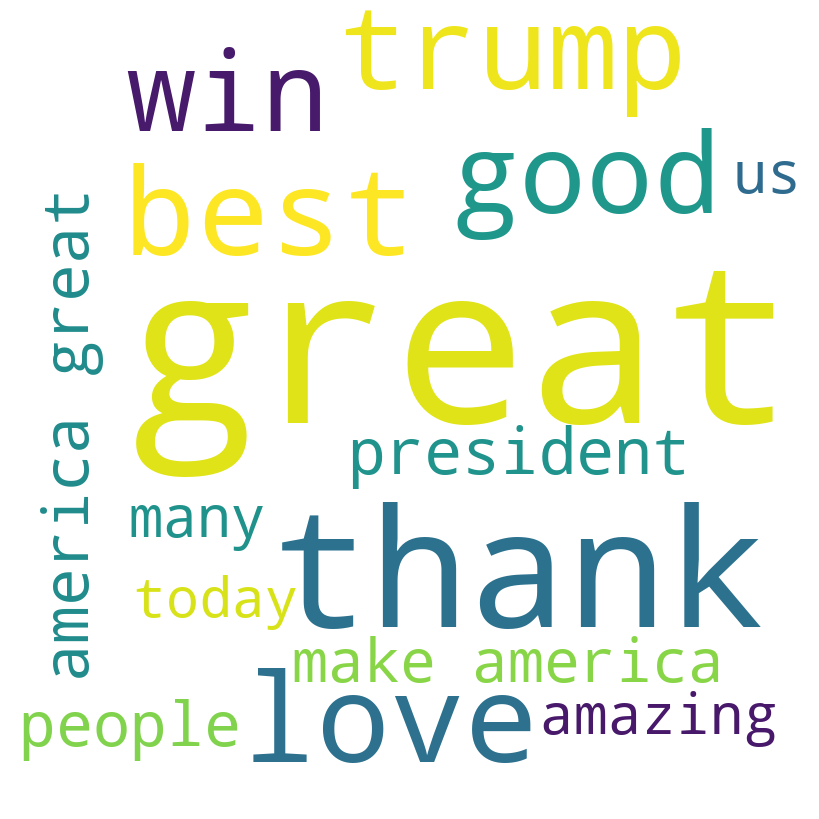

Top 30 Words in Cluster 4: 
         word  frequency
0       great       2857
1       trump        761
2        good        655
3       thank        538
4        best        506
5        make        468
6     america        441
7   president        438
8        love        428
9      people        404
10        win        357
11       many        340
12      would        333
13     thanks        311
14        job        310
15    country        286
16        one        256
17      happy        245
18    amazing        245
19         us        241
20     better        224
21       like        223
22     donald        218
23       nice        214
24        get        210
25  wonderful        196
26       time        193
27      today        193
28        see        186
29       show        184


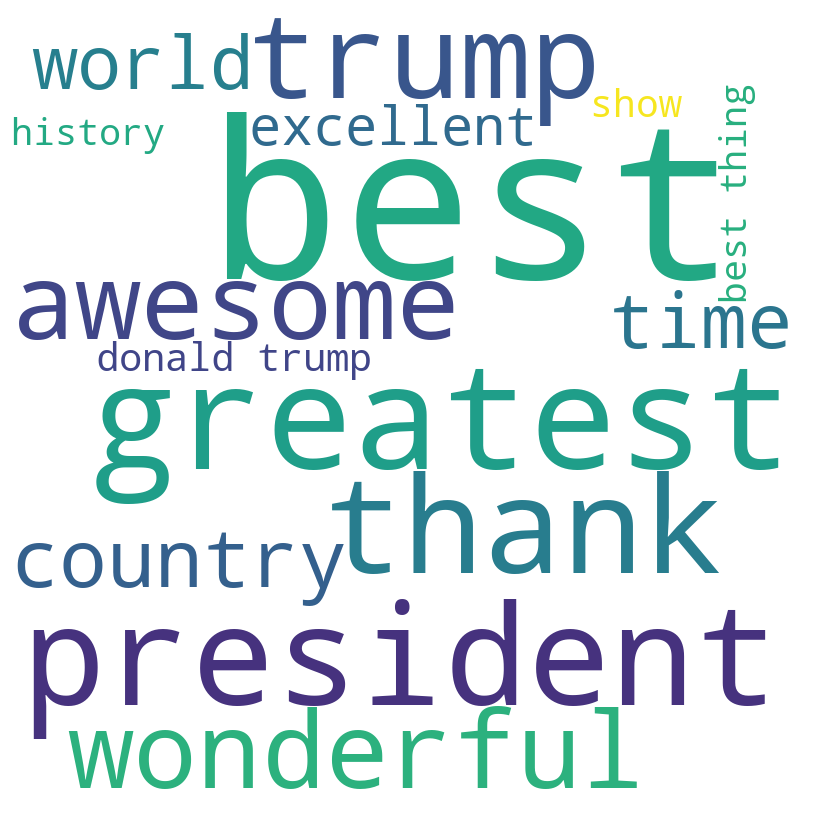

Top 30 Words in Cluster 5: 
             word  frequency
0            best        255
1           trump         70
2       president         65
3        greatest         64
4           thank         53
5            ever         45
6         awesome         38
7       wonderful         38
8           would         33
9             one         26
10        country         25
11           time         23
12         donald         22
13           make         22
14      excellent         21
15             mr         20
16           show         20
17           dont         19
18          world         18
19        history         17
20          thing         17
21        perfect         15
22        america         14
23           like         14
24  apprenticenbc         13
25         people         13
26           cant         13
27      trump2016         12
28           vote         12
29        economy         12


In [26]:
for i in range(df["cluster"].nunique()):
    # filter tweets for the current cluster
    cluster_df = df[df["cluster"] == i]
    # concatenate the text of all tweets in the current cluster
    text = " ".join(cluster_df["text"])
    # generate the word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=800, max_words=15, background_color="white").generate(text)
    # plot the word cloud for the current cluster
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    # generate a table of word frequencies for the current cluster
    word_freq = pd.Series(text.split()).value_counts().reset_index()
    word_freq.columns = ["word", "frequency"]
    top_30_words = word_freq.head(30)
    print("Top 30 Words in Cluster {}: ".format(i+1))
    print(top_30_words)

* **Cluster 1 (Sentiment score between -1.0 and -0.6)**
The top 30 words found in this cluster suggest a very negative sentiment towards the subject, which could be Donald Trump, Barack Obama or the Democratic Party, as all three of them are mentioned in the top 10 words. Words such as "bad," "terrible," "worst," "horrible," "stupid," and "pathetic" indicate a high level of negativity in the tweets. **This cluster contains tweets that are critical of a policy or an action taken by the subject, which has resulted in a negative reaction from the users.** The high frequency of words like "people," "us," "country," and "deal" suggest that the negativity is related to a decision that has been made on a national level, perhaps related to foreign policy, healthcare, or the economy. 

* **Cluster 2 (Sentiment score between -0.6 and -0.2)**
The top 30 words found in cluster 2 indicate that the cluster is focused on news and politics with a negative sentiment towards the current President, Trump and the Democrats. **The cluster also includes words such as "fake", "media", and "wrong" which suggest that the users in this cluster are critical of the way news is being presented and reported. The word "never" is also found in this cluster indicating a sentiment of frustration and hopelessness towards the political system.** It appears that the users in this cluster are critical of the news and political establishment.

* **Cluster 3 (Sentiment score between -0.2 and 0.2)**
The third cluster seems to have a neutral sentiment, with no overwhelmingly negative or positive words in the top 30. The most frequent words are related to the current president, Donald Trump, with "Trump" being the most frequent word in the cluster, followed by "president" and "great". Other common words are "thanks", "thank", "country", "like", "one", and "going". **This suggests that the tweets in this cluster are generally discussing political and social issues related to the United States, without necessarily expressing strong opinions or emotions about them. The presence of words like "vote" and "back" also suggest a focus on the political process, perhaps related to upcoming elections.**

* **Cluster 4 (Sentiment score between 0.2 and 0.6)**
Cluster 4 has a positive sentiment score and is characterized by several topics. Firstly, the cluster contains positive words, such as "great", "good", "best", and "wonderful", which are often used to express approval and appreciation. Secondly, the words "America" and "President" suggest that topics in this cluster are expressing support for the United States and its leadership. Thirdly, there are words related to achievement and success, such as "job" and "better", which indicate a focus on self-improvement and progress. **Thus, Cluster 4 reflects a positive sentiment and highlights themes of support for the US, expressions of approval, and a desire for achievement and success in the employment department.**

* **Cluster 5 (Sentiment score between 0.6 and 1.0)**
In Cluster 5, the sentiment score appears to be positive as most of the words are positive words such as "best", "greatest", "awesome", "wonderful", and "excellent". It also appears that this cluster contains words related to Donald Trump such as "Trump", "President", "Donald", and "ApprenticeNBC", indicating that Donald Trump has positive feelings towards himself and his achievements. Furthermore, the cluster contains words related to achievement and success such as "ever", "world", "history", and "perfect". **Overall, it seems that this cluster contains positive sentiments and words of support for Donald Trump and his accomplishments.**

Create a scatter plot of sentiment_score vs. retweets

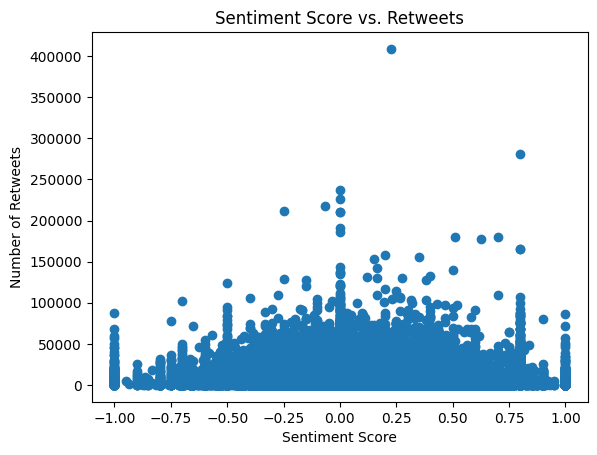

In [27]:
plt.scatter(df["sentiment_score"], df["retweets"])
plt.title("Sentiment Score vs. Retweets")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Retweets")
plt.show()

Create a scatter plot of sentiment_score vs. favorites

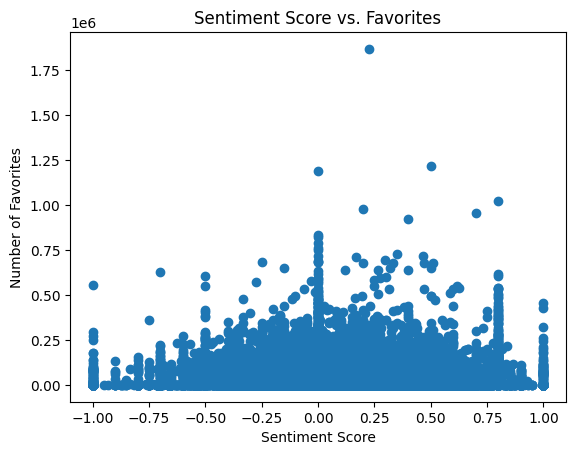

In [28]:
plt.scatter(df["sentiment_score"], df["favorites"])
plt.title("Sentiment Score vs. Favorites")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Favorites")
plt.show()

Create a list to store the total retweets for each cluster, loop through each cluster and calculate the total retweets to plot a histogram of sentiment score vs. total retweets for each cluster

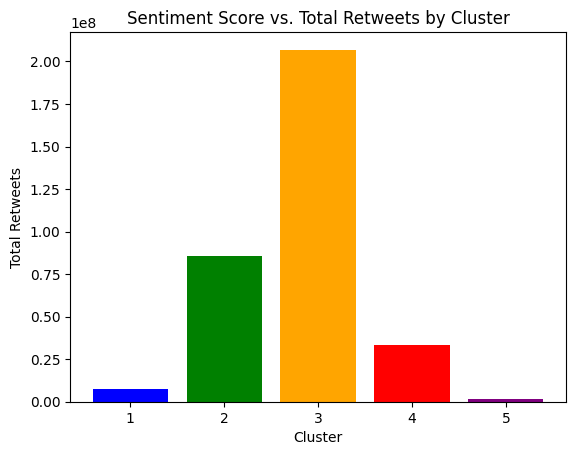

In [29]:
retweets_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_retweets = cluster_df["retweets"].sum()
    retweets_by_cluster.append(total_retweets)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), retweets_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Retweets by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Retweets")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Create a list to store the total favorites for each cluster, loop through each cluster and calculate the total favorites to plot a histogram of sentiment score vs. total favorites for each cluster

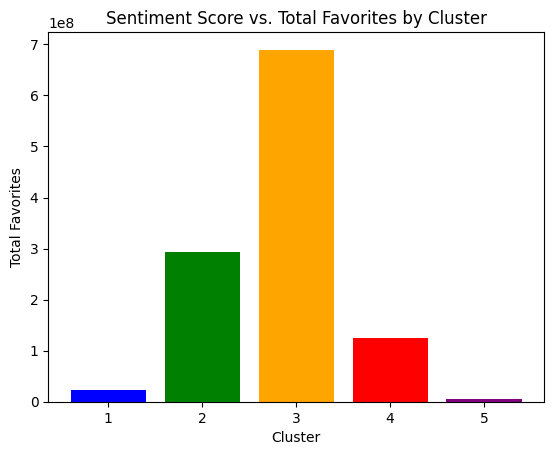

In [30]:
favorites_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_favorites = cluster_df["favorites"].sum()
    favorites_by_cluster.append(total_favorites)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), favorites_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Favorites by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Favorites")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Print the average retweets for each cluster

In [31]:
# calculate the average retweets per cluster
avg_retweets = df.groupby('cluster')['retweets'].mean()

# print the average retweets per cluster
print(avg_retweets)

cluster
0     7561.735417
1    11782.023198
2     8036.655829
3     5468.699021
4     3908.280269
Name: retweets, dtype: float64


Print the average favorites for each cluster

In [32]:
# calculate the average favorites per cluster
avg_favorites = df.groupby('cluster')['favorites'].mean()

# print the average favorites per cluster
print(avg_favorites)

cluster
0    23230.593750
1    40181.215100
2    26786.098007
3    20476.367210
4    12841.961883
Name: favorites, dtype: float64


#### Factors that drive retweetting and favoriting behavior on Twitter

1. Content quality: High-quality content that is interesting, informative, and entertaining is more likely to be retweeted.


2. Emotional engagement: Emotional content that triggers strong feelings such as happiness, awe, or anger is more likely to be retweeted.


3. Relevance: Content that is relevant to the interests of a user's followers or the general Twitter audience is more likely to be retweeted.


4. Timeliness: Fresh and current content that is related to current events or trending topics is more likely to be retweeted.


5. Source credibility: Content shared by credible sources such as verified accounts or reputable news sources is more likely to be retweeted.

# Which topics to bring up on Twitter to spark conversation, be a popular subject, and to be liked by your community

### (based on Trump's Twitter activity)

Based on the average number of retweets per cluster, it appears that tweets from cluster 2 generated the highest number of retweets, followed by cluster 1 and 3. This suggests that **discussing issues related to media bias, fake news, and frustration with the political system can generate a high level of emotional engagement and relevance with Twitter users, which can drive retweets.**

On the other hand, tweets from cluster 4 and 5 generated the lowest number of retweets, indicating that **positive sentiments and expressions of support for the US or Donald Trump may not be as effective in generating retweets as criticism or frustration with political or media-related issues.**

Therefore, someone who wants to generate a high level of retweets on Twitter should focus on discussing issues related to media bias, fake news, and frustration with the political system to tap into the emotional engagement and relevance of Twitter users. It's also important to ensure that the tweets are of high quality, timely, and credible to maximize their impact.